# step1: Data collection

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
import time 
from collections import Counter
import os
   

In [2]:
from sklearn.exceptions import ConvergenceWarning
from sklearn import preprocessing 
from sklearn import tree
from sklearn import linear_model
from imblearn.under_sampling import RandomUnderSampler

In [3]:
#Block warnings
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# loading the dataset
traffic_data = pd.read_csv('C://Users//getac//Documents//Thesis file//Dataset//road_traffic_accident_data.csv',header=0)
traffic_data.head()

Time Day_of_week Age_band_of_driver Drivers_gender   Educational_level  \
0  17:02:00      Monday              18-30           Male   Above high school   
1  17:02:00      Monday              31-50           Male  Junior high school   
2  17:02:00      Monday              18-30           Male  Junior high school   
3   1:06:00      Sunday              18-30           Male  Junior high school   
4   1:06:00      Sunday              18-30           Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Number_of_casualties  \
0            Owner              Above 10yr  ...                    2   
1            Owner                 5-10yrs  ...                    2   
2            Owner                     NaN  ...                    2   
3     Governmental                     NaN  ...                    2   
4            Owner                 5-10yrs  ...                    2   

  Vehicle_movement   Casualty_class Casualty_gender Age_band_of_casualty  \
0   Going straight               na              na                   na   
1   Going straight               na              na                   na   
2   Going straight  Driver or rider            Male                31-50   
3   Going straight       Pedestrian          Female                18-30   
4   Going straight               na              na                   na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 31 columns]

# Step2: Data preprocessing


##  A: Data cleaning
    Data cleaning consistes:
        - removing unwanted data
        - dealing missing values, 
        - removing less important rows and columns
        - removing duplicate values     
        we might even have to restructure the dataset and change the rows and columns or index of rows and columns.

In [5]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063 entries, 0 to 13062
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         13063 non-null  object
 1   Day_of_week                  13063 non-null  object
 2   Age_band_of_driver           13063 non-null  object
 3   Drivers_gender               13063 non-null  object
 4   Educational_level            12297 non-null  object
 5   Vehicle_driver_relation      12464 non-null  object
 6   Driving_experience           12187 non-null  object
 7   Type_of_vehicle              12096 non-null  object
 8   Owner_of_vehicle             12555 non-null  object
 9   Service_year_of_vehicle      9073 non-null   object
 10  Defect_of_vehicle            8496 non-null   object
 11  Area_accident_occured        12823 non-null  object
 12  Lanes_or_Medians             12586 non-null  object
 13  Road_allignment              12

In [6]:
traffic_data.describe

<bound method NDFrame.describe of            Time Day_of_week Age_band_of_driver Drivers_gender  \
0      17:02:00      Monday              18-30           Male   
1      17:02:00      Monday              31-50           Male   
2      17:02:00      Monday              18-30           Male   
3       1:06:00      Sunday              18-30           Male   
4       1:06:00      Sunday              18-30           Male   
...         ...         ...                ...            ...   
13058  16:00:00    Thursday              18-30           Male   
13059  19:00:00      Friday              18-30           Male   
13060  18:00:00    Saturday            Unknown           Male   
13061  23:30:00     Tuesday              31-50         Female   
13062  23:30:00     Tuesday              18-30           Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                

In [7]:
import json

# Create a dictionary to store unique categories
unique_categories_dict = {}

# Extract and store unique categories of each column
for column in traffic_data.columns:
    if traffic_data[column].dtype == 'object':
        unique_categories = list(set(traffic_data[column].unique()))
        unique_categories_dict[column] = unique_categories

# Print the unique categories in the desired format
output_str = json.dumps(unique_categories_dict, indent=4)
print("RTA dataset unique categories")
for line in output_str.split('\n'):
    print(f"    {line}")

RTA dataset unique categories
    {
        "Time": [
            "13:01:00",
            "19:45:00",
            "11:42:00",
            "9:55:00",
            "9:47:00",
            "8:56:00",
            "12:39:00",
            "10:24:00",
            "18:06:00",
            "0:20:00",
            "22:15:00",
            "1:18:00",
            "20:51:00",
            "21:33:00",
            "8:01:00",
            "15:19:00",
            "17:02:00",
            "15:05:00",
            "17:39:00",
            "20:31:00",
            "18:08:00",
            "16:51:00",
            "20:14:00",
            "12:59:00",
            "19:52:00",
            "8:45:00",
            "15:44:00",
            "22:45:00",
            "2:34:00",
            "19:33:00",
            "5:20:00",
            "14:14:00",
            "8:09:00",
            "6:14:00",
            "19:48:00",
            "3:07:00",
            "15:52:00",
            "9:53:00",
            "13:17:00",
            "13:37:00",

### i.  Dealing Missing Value
    When the dataset includes missing values, they need to be rejected or replaced before fitting this data into the model. 
    Pandas provides some useful functions to deal with this problem.

In [8]:
#calculate total number of missing value 
print('The dataset has total of',traffic_data.isnull().sum().sum(),'Missing Values')

The dataset has total of 19774 Missing Values


In [9]:
#identifying collumns and rows that contain missing value with table
def missing_values_table(traffic_data):
    # Total missing values
    mis_val = traffic_data.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * traffic_data.isnull().sum() / len(traffic_data)

    # Create a DataFrame with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table.columns = ['Missing Values', '% of Total Values']

    # Sort the table by percentage of missing values (descending)
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print summary information
    print(f"The dataset has {traffic_data.shape[1]} columns.")
    print(f"There are {mis_val_table.shape[0]} columns that have missing values.\n")
    
    # Return the DataFrame with missing information
    return mis_val_table
missing_values_table(traffic_data)

The dataset has 31 columns.
There are 14 columns that have missing values.



Missing Values  % of Total Values
Defect_of_vehicle                  4567               35.0
Service_year_of_vehicle            3990               30.5
Work_of_casuality                  3382               25.9
Fitness_of_casuality               2795               21.4
Type_of_vehicle                     967                7.4
Driving_experience                  876                6.7
Educational_level                   766                5.9
Vehicle_driver_relation             599                4.6
Owner_of_vehicle                    508                3.9
Lanes_or_Medians                    477                3.7
Vehicle_movement                    308                2.4
Area_accident_occured               240                1.8
Type_of_collision                   155                1.2
Road_allignment                     144                1.1

<Axes: >

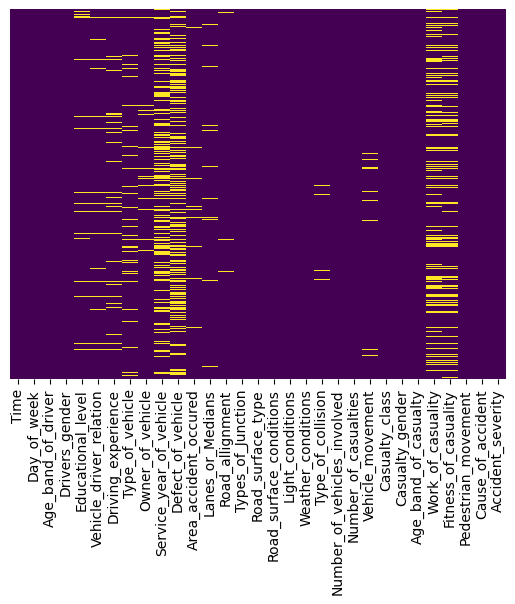

In [10]:
#identify distrbution of missing value relative to total data used in the study
sns.heatmap(traffic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# handling missing values by replacing null value with Unknown
attributes_with_missing = traffic_data.columns[traffic_data.isnull().any()]

# Function to replace missing categorical values with "Unknown"
def impute_categorical_missing(traffic_data, attributes):
    for attribute in attributes:
        traffic_data[attribute] = traffic_data[attribute].fillna("Unknown")

# Call the function to replace missing values with "Unknown" category
impute_categorical_missing(traffic_data, attributes_with_missing)
print(traffic_data.isnull().sum().sum(), "Missing value: All the missing values are handled")


0 Missing value: All the missing values are handled


### ii. Removing Duplicated Value
    we need to remove duplicated data if it is exists because of less-important for model training

In [12]:
# Removing duplicated value
traffic_data.duplicated().sum()

0

In [13]:
traffic_data.head()

Time Day_of_week Age_band_of_driver Drivers_gender   Educational_level  \
0  17:02:00      Monday              18-30           Male   Above high school   
1  17:02:00      Monday              31-50           Male  Junior high school   
2  17:02:00      Monday              18-30           Male  Junior high school   
3   1:06:00      Sunday              18-30           Male  Junior high school   
4   1:06:00      Sunday              18-30           Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr              Unknown   

  Owner_of_vehicle Service_year_of_vehicle  ... Number_of_casualties  \
0            Owner              Above 10yr  ...                    2   
1            Owner                 5-10yrs  ...                    2   
2            Owner                 Unknown  ...                    2   
3     Governmental                 Unknown  ...                    2   
4            Owner                 5-10yrs  ...                    2   

  Vehicle_movement   Casualty_class Casualty_gender Age_band_of_casualty  \
0   Going straight               na              na                   na   
1   Going straight               na              na                   na   
2   Going straight  Driver or rider            Male                31-50   
3   Going straight       Pedestrian          Female                18-30   
4   Going straight               na              na                   na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0           Unknown              Unknown    Not a Pedestrian   
1           Unknown              Unknown    Not a Pedestrian   
2            Driver              Unknown    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4           Unknown              Unknown    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 31 columns]

### iii. Removing irrelevant data
    Removing less important features to predict the accident severity           inorder to enhance the model performance

In [14]:
# removing irellevant features
traffic_data.drop(['Casualty_class',
                   'Casualty_gender',
                   'Age_band_of_casualty',
                   'Work_of_casuality',
                   'Fitness_of_casuality',
                  ], axis=1, inplace=True)

In [15]:
traffic_data.head(3)

Time Day_of_week Age_band_of_driver Drivers_gender   Educational_level  \
0  17:02:00      Monday              18-30           Male   Above high school   
1  17:02:00      Monday              31-50           Male  Junior high school   
2  17:02:00      Monday              18-30           Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   

  Owner_of_vehicle Service_year_of_vehicle  ... Road_surface_conditions  \
0            Owner              Above 10yr  ...                     Dry   
1            Owner                 5-10yrs  ...                     Dry   
2            Owner                 Unknown  ...                     Dry   

  Light_conditions Weather_conditions  \
0         Daylight             Normal   
1         Daylight             Normal   
2         Daylight             Normal   

                         Type_of_collision Number_of_vehicles_involved  \
0  Collision with roadside-parked vehicles                           2   
1           Vehicle with vehicle collision                           2   
2          Collision with roadside objects                           2   

  Number_of_casualties Vehicle_movement Pedestrian_movement  \
0                    2   Going straight    Not a Pedestrian   
1                    2   Going straight    Not a Pedestrian   
2                    2   Going straight    Not a Pedestrian   

           Cause_of_accident Accident_severity  
0            Moving Backward     Slight Injury  
1                 Overtaking     Slight Injury  
2  Changing lane to the left    Serious Injury  

[3 rows x 26 columns]

## B. Explatory Data analysis

In [16]:
# The selected features are:
traffic_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Drivers_gender',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [17]:
# count the number of each catagory of targere variable
print(traffic_data['Accident_severity'].value_counts())

Slight Injury     10776
Serious Injury     1976
Fatal injury        311
Name: Accident_severity, dtype: int64


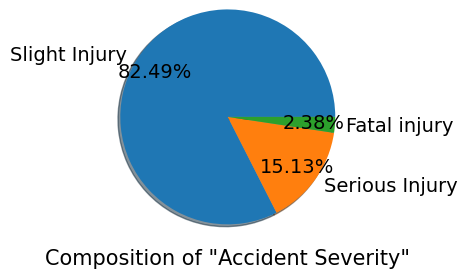

In [18]:
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(traffic_data["Accident_severity"].value_counts(),
        labels=list(traffic_data["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

<Axes: >

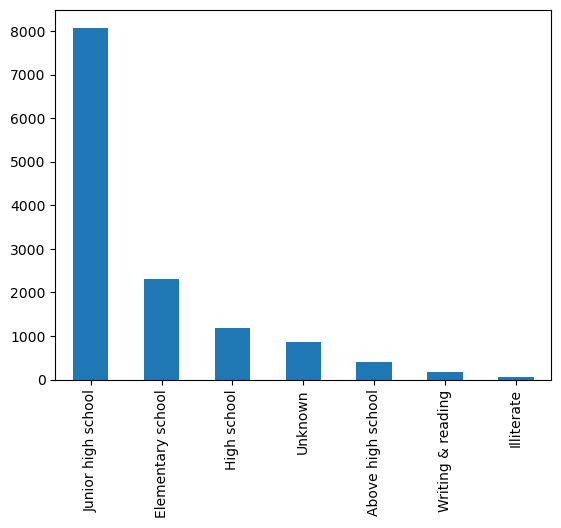

In [19]:
traffic_data['Educational_level'].value_counts().plot(kind='bar')

In [20]:
#pip install dabl


Target looks like classification
Showing only top 10 of 24 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 None,
 array([[<Axes: title={'center': 'Area_accident_occured'}>,
         <Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Pedestrian_movement'}>,
         <Axes: title={'center': 'Number_of_casualties'}>],
        [<Axes: title={'center': 'Type_of_collision'}>,
         <Axes: title={'center': 'Lanes_or_Medians'}>,
         <Axes: title={'center': 'Weather_conditions'}>,
         <Axes: title={'center': 'Light_conditions'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>]], dtype=object)]

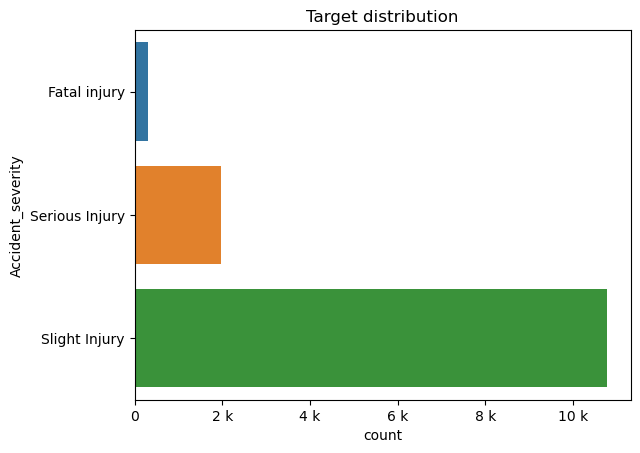

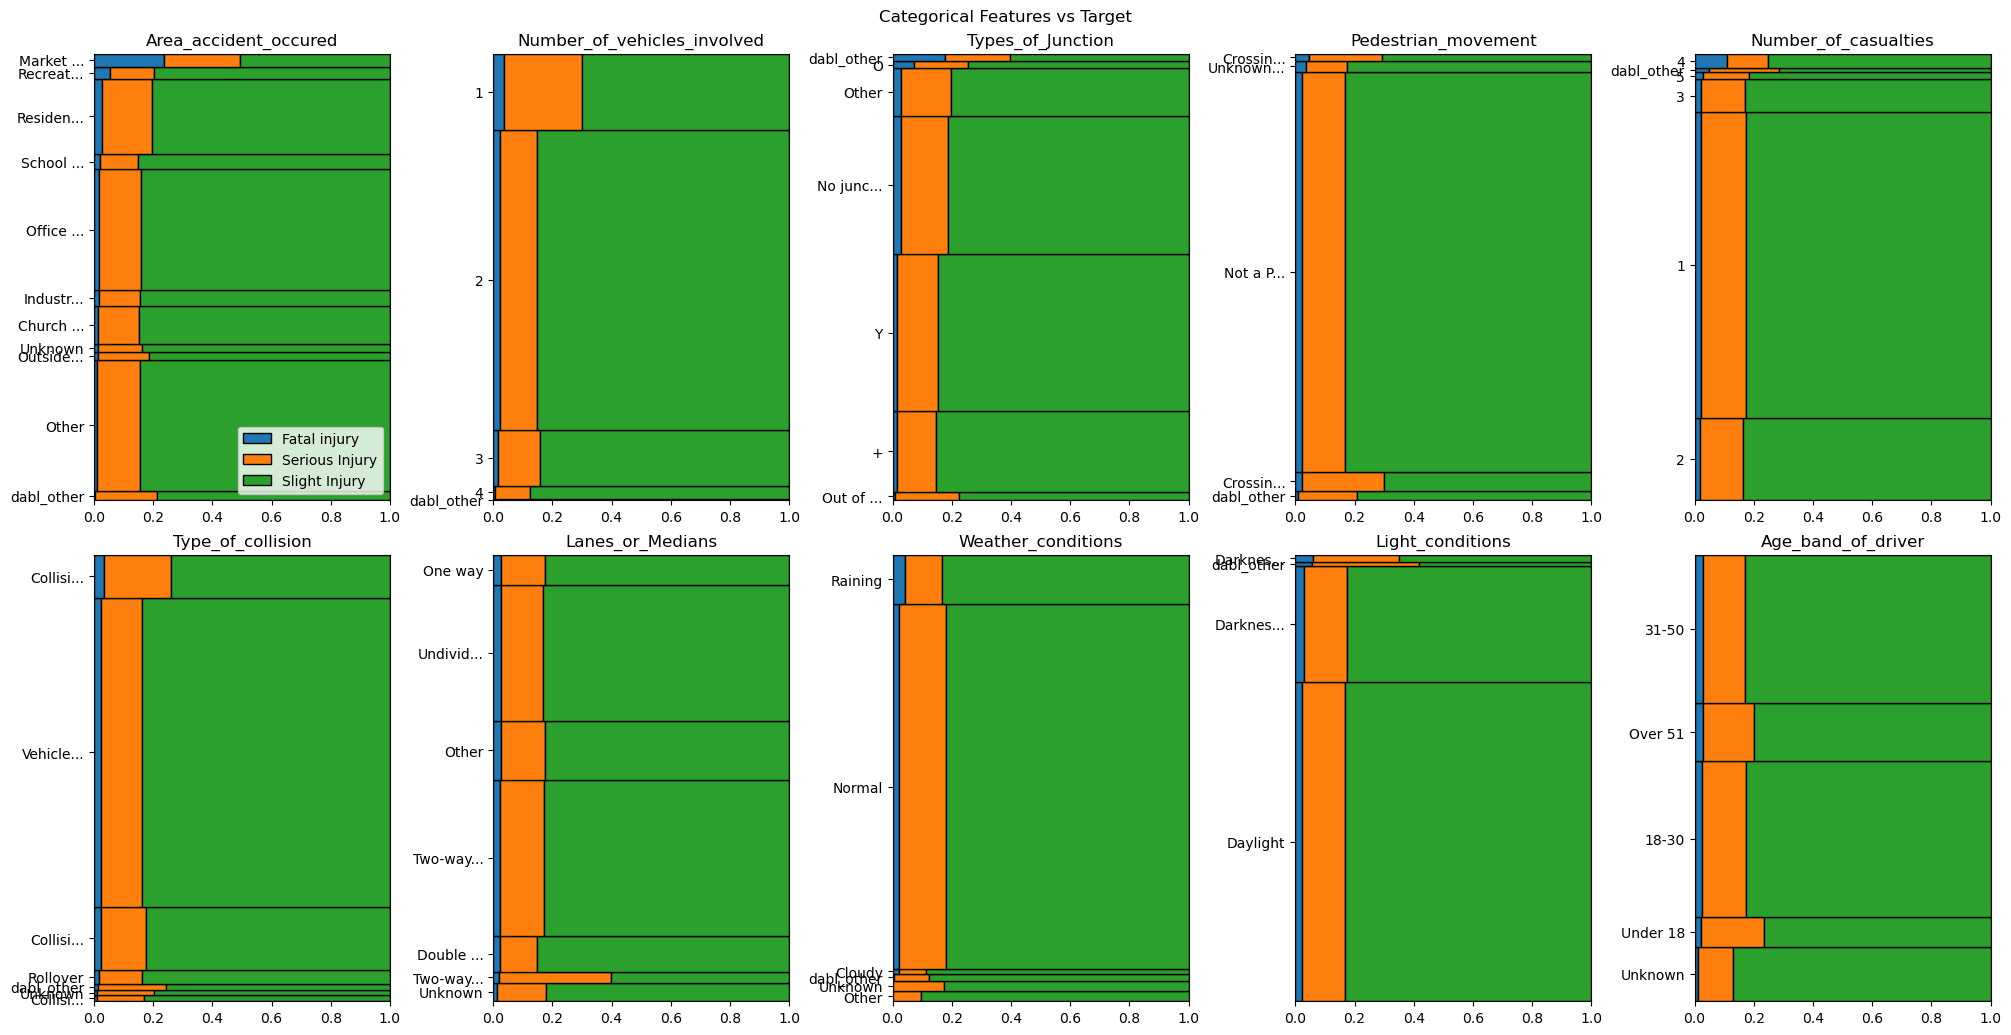

In [21]:
import dabl
dabl.plot(traffic_data, target_col='Accident_severity')

In [22]:
traffic_data.corr()

Number_of_vehicles_involved  Number_of_casualties
Number_of_vehicles_involved                      1.00000               0.21014
Number_of_casualties                             0.21014               1.00000

#### Some Insights from the Initial Data Analysis:
- More the Number of casualties, higher the chances of fatal injuries at accident site
- More the vehicles involved higher the chances of Serious injury
- Light_conditions being darkness can cause higher serious injury
- data is highly imbalanced
- Features like `area_accident_occured`, `Cause_of_accident`, `Day_of_week`, `type_of_junction` seem to be imporatant features causing fatal injuries 
- Road_surface and road conditions do not affect fatal or serious accidents apparently 

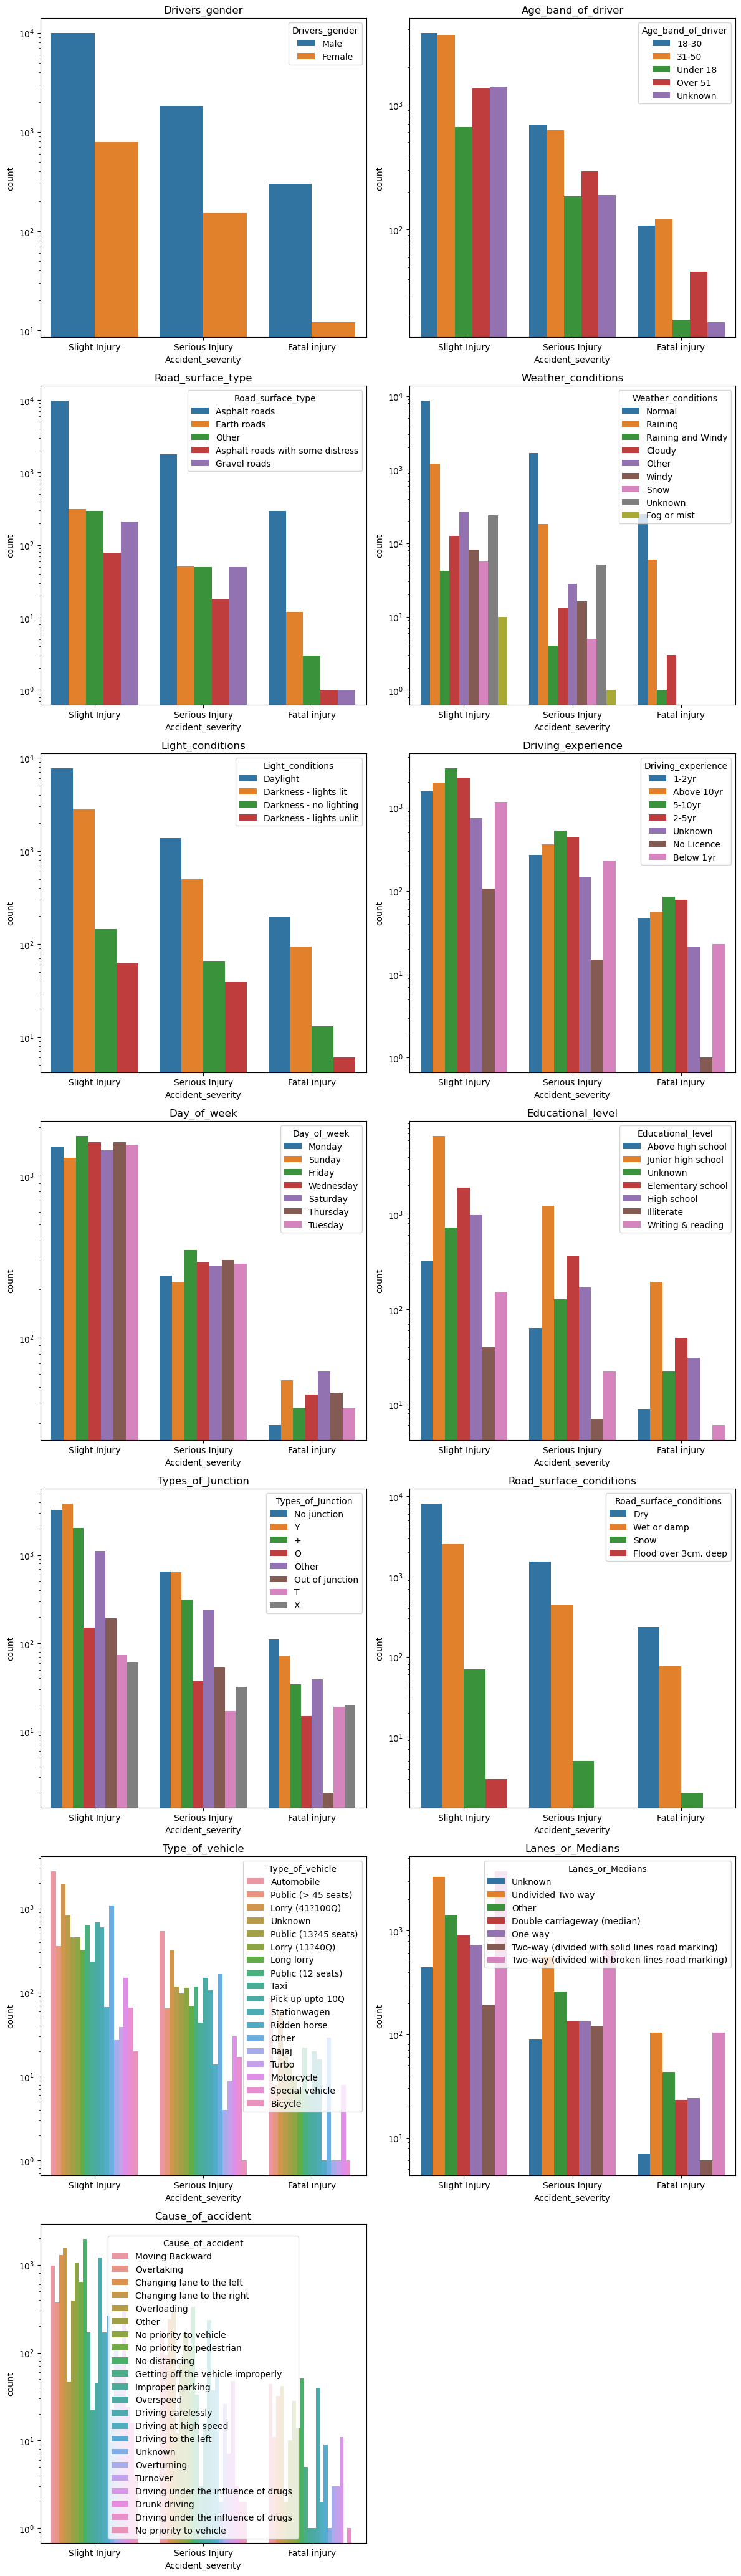

In [23]:
#visualize some attrbutes of traffic accident data
def create_countplot_with_hue(traffic_data, target_column, columns_to_plot):
    num_plots = len(columns_to_plot)
    num_cols = 2  # Number of columns for subplots
    num_rows = (num_plots + 1) // 2  # Number of rows for subplots
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
    
    for i, column in enumerate(columns_to_plot):
        row = i // num_cols
        col = i % num_cols
        
        sns.countplot(x=traffic_data[target_column], hue=traffic_data[column], ax=axes[row, col])
        axes[row, col].set_title(f"{column}")
        axes[row, col].set_yscale('log')  # Apply logarithmic scale to the y-axis
    
    # Remove any empty subplots
    for i in range(num_plots, num_cols * num_rows):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()

# List of columns to create countplots for
columns_to_plot = ['Drivers_gender', 
                   'Age_band_of_driver', 
                   'Road_surface_type', 
                   'Weather_conditions',
                   'Light_conditions', 
                   'Driving_experience', 
                   'Day_of_week', 
                   'Educational_level', 
                   'Types_of_Junction', 
                   'Road_surface_conditions',
                   'Type_of_vehicle',
                   'Lanes_or_Medians', 
                   'Cause_of_accident'
                  ] 

# Call the function to create countplots with hue
create_countplot_with_hue(traffic_data, 'Accident_severity', columns_to_plot)

## C. Data Encoding and Transformetion

In [24]:
# Convert 'Time' to datetime and create 'time_period' column
traffic_data['Time'] = pd.to_datetime(traffic_data['Time'])
def get_time_period(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 13:
        return 'Noon'
    elif 13 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

traffic_data['time_period'] = traffic_data['Time'].apply(get_time_period)

In [25]:
# extracting hour and minute from timestamp
traffic_data['hour'] = traffic_data['Time'].dt.hour
traffic_data['minute'] = traffic_data['Time'].dt.minute
traffic_data.drop('Time', axis=1, inplace=True)

In [26]:
# Create new DataFrame with the extracted columns
new_columns = traffic_data[['hour', 'minute', 'time_period']]
traffic_data = pd.concat([new_columns, traffic_data.drop(['hour', 'minute', 'time_period'], axis=1)], axis=1)

In [27]:
traffic_data.head()

hour  minute time_period Day_of_week Age_band_of_driver Drivers_gender  \
0    17       2     Evening      Monday              18-30           Male   
1    17       2     Evening      Monday              31-50           Male   
2    17       2     Evening      Monday              18-30           Male   
3     1       6       Night      Sunday              18-30           Male   
4     1       6       Night      Sunday              18-30           Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle  ... Road_surface_conditions       Light_conditions  \
0           Automobile  ...                     Dry               Daylight   
1  Public (> 45 seats)  ...                     Dry               Daylight   
2      Lorry (41?100Q)  ...                     Dry               Daylight   
3  Public (> 45 seats)  ...                     Dry  Darkness - lights lit   
4              Unknown  ...                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

  Number_of_vehicles_involved Number_of_casualties Vehicle_movement  \
0                           2                    2   Going straight   
1                           2                    2   Going straight   
2                           2                    2   Going straight   
3                           2                    2   Going straight   
4                           2                    2   Going straight   

  Pedestrian_movement           Cause_of_accident Accident_severity  
0    Not a Pedestrian             Moving Backward     Slight Injury  
1    Not a Pedestrian                  Overtaking     Slight Injury  
2    Not a Pedestrian   Changing lane to the left    Serious Injury  
3    Not a Pedestrian  Changing lane to the right     Slight Injury  
4    Not a Pedestrian                  Overtaking     Slight Injury  

[5 rows x 28 columns]

In [28]:
# Print columns with data types
column_data_types = traffic_data.dtypes.reset_index()
column_data_types.columns = ['Column', 'Data Type']

print(column_data_types)

                         Column Data Type
0                          hour     int64
1                        minute     int64
2                   time_period    object
3                   Day_of_week    object
4            Age_band_of_driver    object
5                Drivers_gender    object
6             Educational_level    object
7       Vehicle_driver_relation    object
8            Driving_experience    object
9               Type_of_vehicle    object
10             Owner_of_vehicle    object
11      Service_year_of_vehicle    object
12            Defect_of_vehicle    object
13        Area_accident_occured    object
14             Lanes_or_Medians    object
15              Road_allignment    object
16            Types_of_Junction    object
17            Road_surface_type    object
18      Road_surface_conditions    object
19             Light_conditions    object
20           Weather_conditions    object
21            Type_of_collision    object
22  Number_of_vehicles_involved   

In [29]:
# Transforming Noncatagorical datatype into catagorical datatype  using Label-encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a copy of the data DataFrame to preserve the original data
data_encoded = traffic_data.copy()

# Iterate over each column in the DataFrame
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        try:
            # Apply Label Encoding for columns with object data type
            label_encoder = LabelEncoder()
            data_encoded[column] = label_encoder.fit_transform(data_encoded[column])
        except TypeError as e:
            print(f"Error occurred in column '{column}': {e}")
            continue

# Now, the data_encoded DataFrame contains numerical values for categorical variables


In [30]:
# Select the features for clustering
cluster_features = data_encoded[[
    'hour', 'minute','Day_of_week', 'Age_band_of_driver', 'Drivers_gender', 'Educational_level',
    'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
    'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
    'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
    'Number_of_vehicles_involved', 'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'
]]

In [31]:
cluster_features.head()

hour  minute  Day_of_week  Age_band_of_driver  Drivers_gender  \
0    17       2            1                   0               1   
1    17       2            1                   1               1   
2    17       2            1                   0               1   
3     1       6            3                   0               1   
4     1       6            3                   0               1   

   Educational_level  Vehicle_driver_relation  Driving_experience  \
0                  0                        0                   0   
1                  4                        0                   3   
2                  4                        0                   0   
3                  4                        0                   2   
4                  4                        0                   1   

   Type_of_vehicle  Owner_of_vehicle  ...  Road_surface_type  \
0                0                 3  ...                  0   
1               11                 3  ...                  0   
2                5                 3  ...                  0   
3               11                 0  ...                  2   
4               17                 3  ...                  0   

   Road_surface_conditions  Light_conditions  Weather_conditions  \
0                        0                 3                   2   
1                        0                 3                   2   
2                        0                 3                   2   
3                        0                 0                   2   
4                        0                 0                   2   

   Type_of_collision  Number_of_vehicles_involved  Vehicle_movement  \
0                  3                            2                 2   
1                  9                            2                 2   
2                  2                            2                 2   
3                  9                            2                 2   
4                  9                            2                 2   

   Pedestrian_movement  Cause_of_accident  Accident_severity  
0                    7                 10                  2  
1                    7                 18                  2  
2                    7                  0                  1  
3                    7                  1                  2  
4                    7                 18                  2  

[5 rows x 26 columns]

In [32]:
# Perform clustering using K-means algorithm
encoder = OneHotEncoder(sparse=False)
cluster_encoded = encoder.fit_transform(cluster_features)
cluster_encoded_cols = encoder.get_feature_names_out(cluster_features.columns)
cluster_encoded_df = pd.DataFrame(cluster_encoded, columns=cluster_encoded_cols)

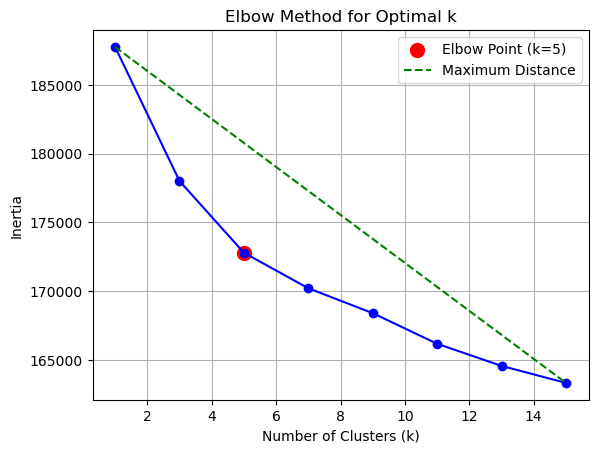

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform clustering using K-means algorithm
inertia = []
k_range = range(1, 16,2)  # Adjust the range as per your requirement

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_encoded_df)
    inertia.append(kmeans.inertia_)

# Plot the Inertia values
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Calculate the distance from the first point to the last point
def distance_from_line(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x, y = p3
    return abs((y2-y1)*x - (x2-x1)*y + x2*y1 - y2*x1) / ((y2-y1)**2 + (x2-x1)**2)**0.5

start_point = (k_range[0], inertia[0])
end_point = (k_range[-1], inertia[-1])

max_distance = 0
elbow_point = None

for i, (k, inertia_val) in enumerate(zip(k_range, inertia)):
    dist = distance_from_line(start_point, end_point, (k, inertia_val))
    if dist > max_distance:
        max_distance = dist
        elbow_point = (k, inertia_val)

# Plot the elbow point and the line connecting the start and end points
plt.scatter(*elbow_point, color='red', marker='o', s=100, label='Elbow Point (k=5)')
plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], linestyle='--', color='green', label='Maximum Distance')
plt.legend()

plt.grid(True)
plt.show()


In [34]:
# Perform K-means clustering on cluster_features to determine the optimal number of clusters
kmeans = KMeans(n_clusters=elbow_point[0], random_state=42)
cluster_labels = kmeans.fit_predict(cluster_encoded_df)
cluster_features['cluster_label'] = cluster_labels

# One-Hot Encoding of cluster labels
encoder = OneHotEncoder(sparse=False)
cluster_encoded = encoder.fit_transform(cluster_features[['cluster_label']])
cluster_encoded_cols = ['cluster_' + str(i) for i in range(cluster_encoded.shape[1])]
cluster_encoded_df = pd.DataFrame(cluster_encoded, columns=cluster_encoded_cols)

data_combined = pd.concat([cluster_features, cluster_encoded_df], axis=1)


In [35]:
data_combined

hour  minute  Day_of_week  Age_band_of_driver  Drivers_gender  \
0        17       2            1                   0               1   
1        17       2            1                   1               1   
2        17       2            1                   0               1   
3         1       6            3                   0               1   
4         1       6            3                   0               1   
...     ...     ...          ...                 ...             ...   
13058    16       0            4                   0               1   
13059    19       0            0                   0               1   
13060    18       0            2                   4               1   
13061    23      30            5                   1               0   
13062    23      30            5                   0               1   

       Educational_level  Vehicle_driver_relation  Driving_experience  \
0                      0                        0                   0   
1                      4                        0                   3   
2                      4                        0                   0   
3                      4                        0                   2   
4                      4                        0                   1   
...                  ...                      ...                 ...   
13058                  4                        0                   3   
13059                  4                        2                   3   
13060                  4                        0                   3   
13061                  4                        0                   5   
13062                  4                        0                   0   

       Type_of_vehicle  Owner_of_vehicle  ...  Vehicle_movement  \
0                    0                 3  ...                 2   
1                   11                 3  ...                 2   
2                    5                 3  ...                 2   
3                   11                 0  ...                 2   
4                   17                 3  ...                 2   
...                ...               ...  ...               ...   
13058               14                 3  ...                 3   
13059                5                 3  ...                 2   
13060               15                 3  ...                 2   
13061                0                 3  ...                12   
13062                3                 3  ...                 3   

       Pedestrian_movement  Cause_of_accident  Accident_severity  \
0                        7                 10                  2   
1                        7                 18                  2   
2                        7                  0                  1   
3                        7                  1                  2   
4                        7                 18                  2   
...                    ...                ...                ...   
13058                    7                 11                  2   
13059                    7                 10                  0   
13060                    7                  0                  2   
13061                    7                  1                  0   
13062                    7                 11                  0   

       cluster_label  cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  
0                  1        0.0        1.0        0.0        0.0        0.0  
1                  1        0.0        1.0        0.0        0.0        0.0  
2                  2        0.0        0.0        1.0        0.0        0.0  
3                  0        1.0        0.0        0.0        0.0        0.0  
4                  0        1.0        0.0        0.0        0.0        0.0  
...              ...        ...        ...        ...        ...        ...  
13058              0        1.0        0.0        0.0        0.0        0.0  
13059              

## D. Feature Selection

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Separate the target variable
X = data_combined.drop('Accident_severity', axis=1)
y = data_combined['Accident_severity']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importance ranking
print(feature_importances)


                        Feature  Importance
28                    cluster_2    0.352102
25                cluster_label    0.183637
30                    cluster_4    0.054212
27                    cluster_1    0.036558
29                    cluster_3    0.033650
1                        minute    0.025331
0                          hour    0.025232
26                    cluster_0    0.022775
12        Area_accident_occured    0.020133
18             Light_conditions    0.018416
11            Defect_of_vehicle    0.018327
24            Cause_of_accident    0.018166
2                   Day_of_week    0.016608
8               Type_of_vehicle    0.016109
19           Weather_conditions    0.015095
15            Types_of_Junction    0.013191
21  Number_of_vehicles_involved    0.013093
7            Driving_experience    0.013049
13             Lanes_or_Medians    0.012796
17      Road_surface_conditions    0.011973
3            Age_band_of_driver    0.011099
22             Vehicle_movement 

## E. Class Balancing

The traffic accident dataset used in the study is highly imbalanced, this leads model bias on the minority class. To balace them we use SMOTE techniques of class balancing.

In [37]:
# Use SMOTETomek for over-sampling and under-sampling
from imblearn.combine import SMOTETomek  # Import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Step3: Split data into training and testing sets
Splitting the cleaned data into two sets - a training set and a testing set. The training set is the set your model learns from. A testing set is used to check the accuracy of your model after training.

In [38]:
pd.get_dummies(data_encoded,drop_first=True).shape
X_resampled = pd.get_dummies(X_resampled, drop_first=True)

In [39]:
X_resampled.shape

(32322, 31)

In [40]:
## train test split
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


# Step4: Model Selection and Training

### Model Building stacking

In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

### Staking

In [42]:
# Stacking
base_estimators = [
    ('et', DecisionTreeClassifier()),
    ('gb', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier())
]

stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())


In [43]:
# Train Stacking
stacking_classifier.fit(X_train, y_train)
# Predictions
stacking_predictions = stacking_classifier.predict(X_test)
# Evaluate models
stacking_score = accuracy_score(y_test, stacking_classifier.predict(X_test))
stacking_precision = precision_score(y_test, stacking_predictions, average='weighted')
stacking_recall = recall_score(y_test, stacking_predictions, average='weighted')
stacking_f1_score = f1_score(y_test, stacking_predictions, average='weighted')

# Confusion Matrix
stacking_conf_matrix = confusion_matrix(y_test, stacking_predictions)
print("\nStacking Metrics:")
print("Stacking Accuracy:", stacking_score)
print("Precision:", stacking_precision)
print("Recall:", stacking_recall)
print("F1-score:", stacking_f1_score)
print("Confusion Matrix:")
print(stacking_conf_matrix)


Stacking Metrics:
Stacking Accuracy: 0.9826759474091261
Precision: 0.9828064368433911
Recall: 0.9826759474091261
F1-score: 0.9827092116220745
Confusion Matrix:
[[2110    0   33]
 [   2 2156   38]
 [  27   12 2087]]


### Bagging

In [44]:
# 1. Random Forest
from sklearn.ensemble import RandomForestClassifier
KRF = RandomForestClassifier(n_estimators=400,
                                       criterion="gini",
                                       max_features="sqrt",
                                       max_depth=15,
                                       n_jobs=-1,
                                       random_state=42)
KRF.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=400, n_jobs=-1,
                       random_state=42)

### Boosting

In [45]:
# 2. Light GBM algorithim
from lightgbm import LGBMClassifier
KLGBM = LGBMClassifier()
KLGBM.fit(X_train, y_train)

LGBMClassifier()

In [46]:
# 3. XGBoost
from xgboost import XGBClassifier
KXGB = XGBClassifier()
KXGB.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [47]:
# 4. Artificial Neural Network (ANN) - Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
KMLP = MLPClassifier()
KMLP.fit(X_train, y_train)

MLPClassifier()

In [48]:
# 5. Decision Tree
from sklearn.tree import DecisionTreeClassifier
KDT = DecisionTreeClassifier()
KDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
#6.  K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier
K2NN = KNeighborsClassifier()
K2NN.fit(X_train, y_train)


KNeighborsClassifier()

# Step5: Model evaluation and Validation

--- KRF ---
Accuracy: 0.9796
F1-Score: 0.9796
Precision: 0.9802
Recall: 0.9796
               
Confusion Matrix:
[[2088   13   42]
 [   1 2132   63]
 [  12    1 2113]]


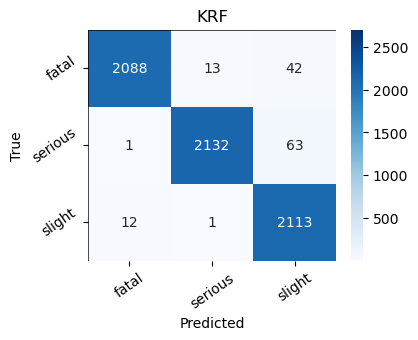

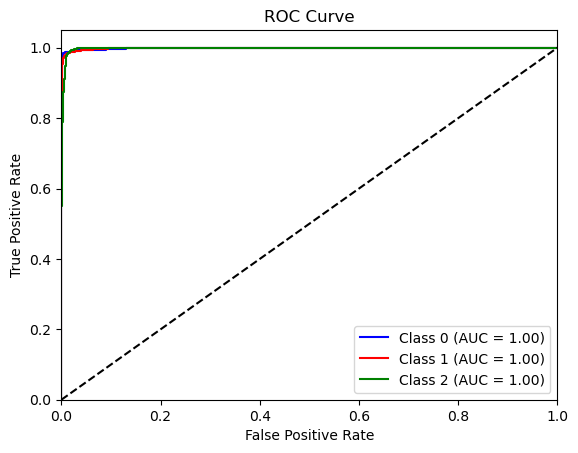


Cross-Validation Scores: [0.98221191 0.97815159 0.98124154 0.97950106 0.98008122]
Cross-Validation Accuracy: 0.9802

--- KLGBM ---
Accuracy: 0.9813
F1-Score: 0.9813
Precision: 0.9815
Recall: 0.9813
               
Confusion Matrix:
[[2104    9   30]
 [   5 2144   47]
 [  21    9 2096]]


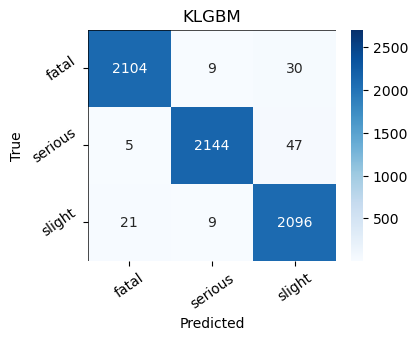

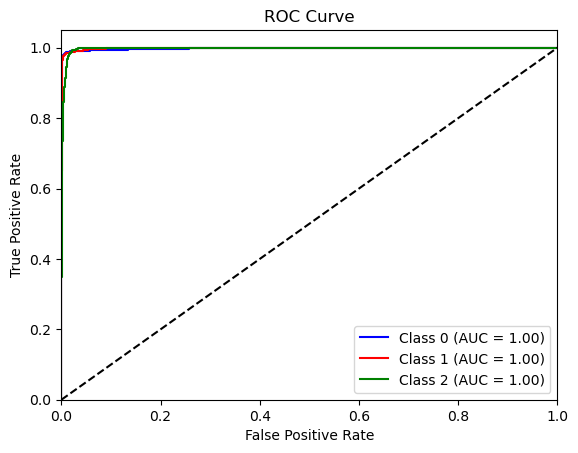


Cross-Validation Scores: [0.98201856 0.98143852 0.98259524 0.9845291  0.98240186]
Cross-Validation Accuracy: 0.9826

--- KXGB ---
Accuracy: 0.9838
F1-Score: 0.9837
Precision: 0.9839
Recall: 0.9838
               
Confusion Matrix:
[[2112    9   22]
 [   3 2152   41]
 [  21    9 2096]]


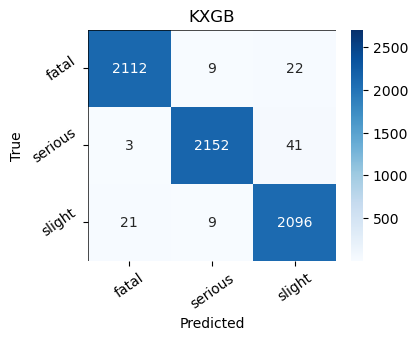

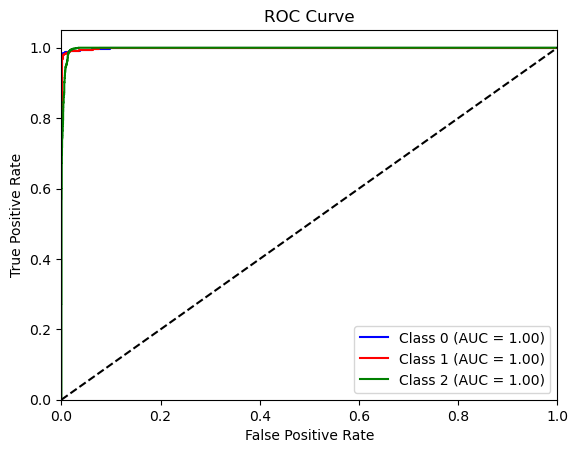


Cross-Validation Scores: [0.98433875 0.9837587  0.98394895 0.98414233 0.9845291 ]
Cross-Validation Accuracy: 0.9841

--- KMLP ---
Accuracy: 0.9652
F1-Score: 0.9651
Precision: 0.9656
Recall: 0.9652
               
Confusion Matrix:
[[2093    4   46]
 [  10 2115   71]
 [  79   15 2032]]


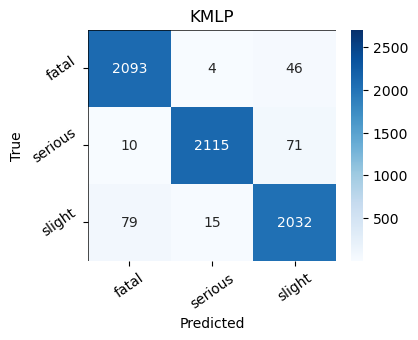

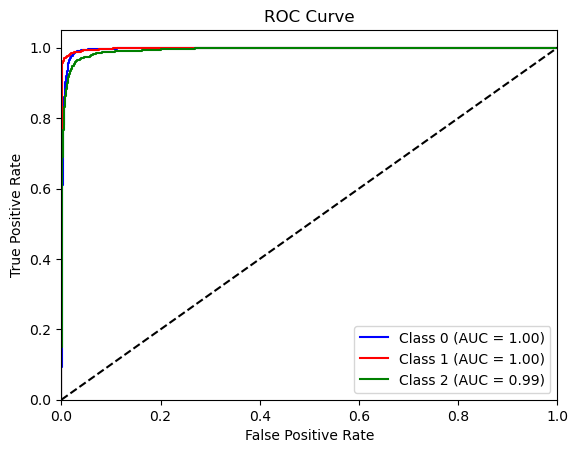


Cross-Validation Scores: [0.96210363 0.96326373 0.96209631 0.95822858 0.95397409]
Cross-Validation Accuracy: 0.9599

--- KDT ---
Accuracy: 0.9618
F1-Score: 0.9616
Precision: 0.9621
Recall: 0.9618
               
Confusion Matrix:
[[2091   16   36]
 [  23 2139   34]
 [ 105   33 1988]]


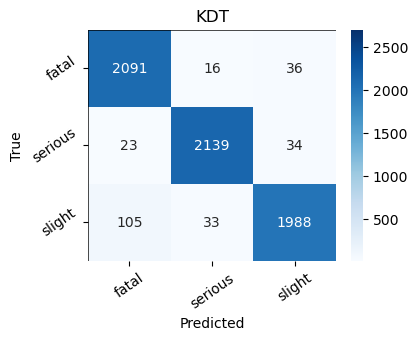

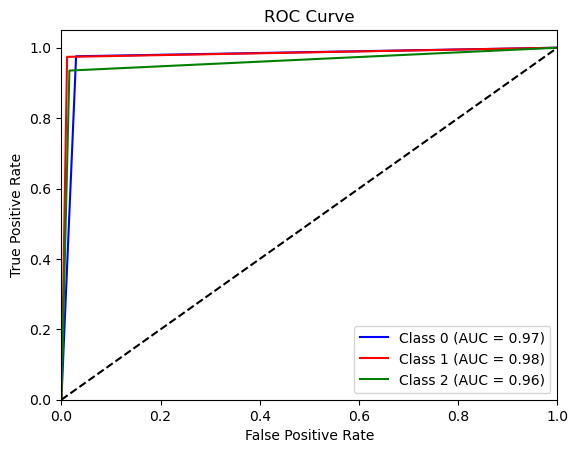


Cross-Validation Scores: [0.95417633 0.95378964 0.95822858 0.95087991 0.95436086]
Cross-Validation Accuracy: 0.9543

--- K2NN ---
Accuracy: 0.8141
F1-Score: 0.7914
Precision: 0.8493
Recall: 0.8141
               
Confusion Matrix:
[[2143    0    0]
 [  20 2153   23]
 [ 411  748  967]]


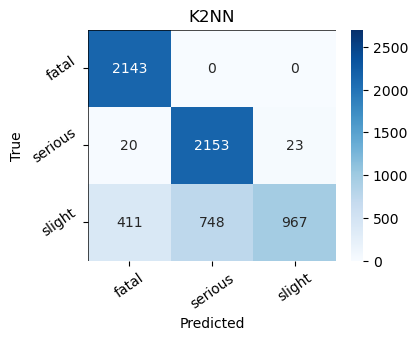

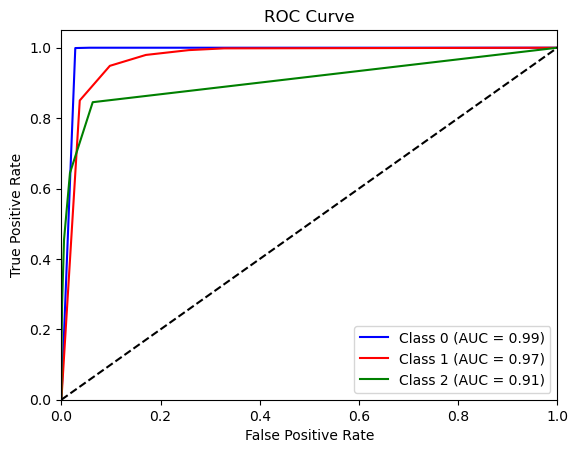


Cross-Validation Scores: [0.80413766 0.79118329 0.79114291 0.79771804 0.79327016]
Cross-Validation Accuracy: 0.7955



In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,make_scorer, auc

# Define a function to calculate and print performance metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("               ")

    # Class names
    class_names = ['fatal', 'serious', 'slight']
    
    # Confusion Matrix
    #custom_cmap = LinearSegmentedColormap.from_list('custom', ['#989b9e', '#36109e','#63109e'])
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    

    plt.figure(figsize=(4, 3))
    
    # Plot the outer boundary
    plt.plot([0, len(class_names)], [0, 0], color='black', linewidth=0.5)
    plt.plot([0, 0], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([len(class_names), len(class_names)], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([0, len(class_names)], [len(class_names), len(class_names)], color='black', linewidth=0.5)
    
    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',vmax=2700)
    plt.gca().set_frame_on(False)
    
    # Rotate the class names by 35 degrees
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name}')
    plt.show()

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)

        n_classes = y_scores.shape[1]
        y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        colors = ["blue", "red", "green", "orange", "purple", "brown", "pink", "gray", "olive"]
        for i in range(n_classes):
            plt.plot(
                fpr[i],
                tpr[i],
                color=colors[i],
                label=f"Class {i} (AUC = {roc_auc[i]:.2f})",
            )

        plt.plot([0, 1], [0, 1], color="black", linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.show()

        print()
    else:
        print("AUC: Not available for this model.\n")

# Perform evaluation for each model
models = [KRF, KLGBM, KXGB, KMLP, KDT, K2NN]
model_names = ['KRF', 'KLGBM', 'KXGB', 'KMLP', 'KDT', 'K2NN']

for model, name in zip(models, model_names):
    print(f"--- {name} ---")
    evaluate_model(model, X_test, y_test)

    # Perform cross-validation using X_train_resampled and y_train_resampled
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}\n")
 

--- KRF ---
Accuracy: 0.9796
F1-Score: 0.9796
Precision: 0.9802
Recall: 0.9796

Confusion Matrix:
[[2088   13   42]
 [   1 2132   63]
 [  12    1 2113]]


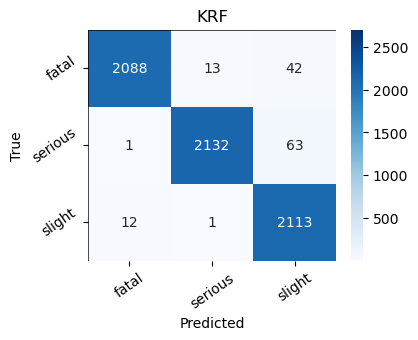

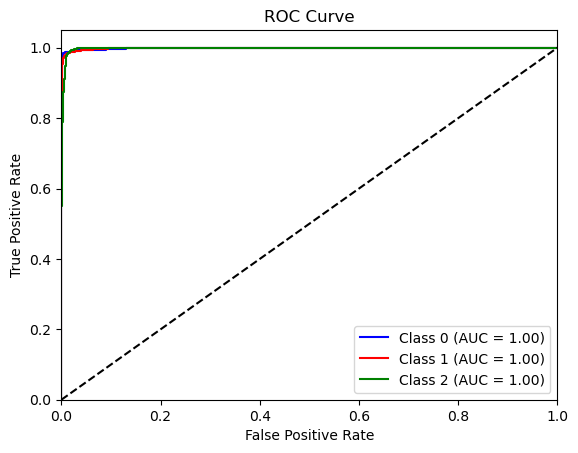


Cross-Validation Scores: [0.93611756 0.99350348 0.99319307 0.99334777 0.98143564]
Cross-Validation Accuracy: 0.9795

--- KLGBM ---
Accuracy: 0.9813
F1-Score: 0.9813
Precision: 0.9815
Recall: 0.9813

Confusion Matrix:
[[2104    9   30]
 [   5 2144   47]
 [  21    9 2096]]


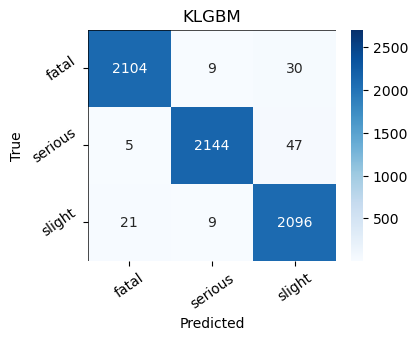

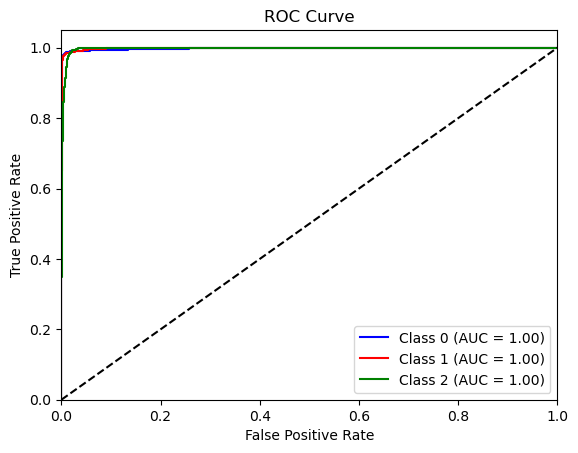


Cross-Validation Scores: [0.93395205 0.99273009 0.99288366 0.99443069 0.96642946]
Cross-Validation Accuracy: 0.9761

--- KXGB ---
Accuracy: 0.9838
F1-Score: 0.9837
Precision: 0.9839
Recall: 0.9838

Confusion Matrix:
[[2112    9   22]
 [   3 2152   41]
 [  21    9 2096]]


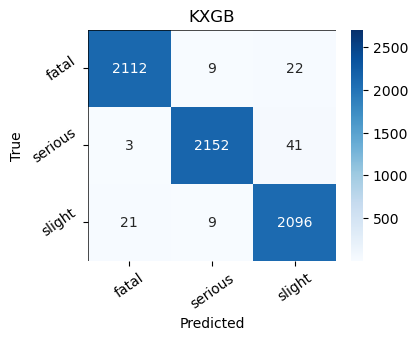

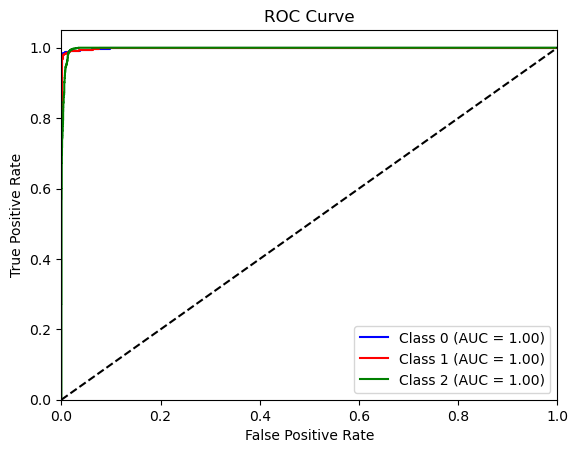


Cross-Validation Scores: [0.93642691 0.99644238 0.99412129 0.99582302 0.96828589]
Cross-Validation Accuracy: 0.9782

--- KMLP ---
Accuracy: 0.9652
F1-Score: 0.9651
Precision: 0.9656
Recall: 0.9652

Confusion Matrix:
[[2093    4   46]
 [  10 2115   71]
 [  79   15 2032]]


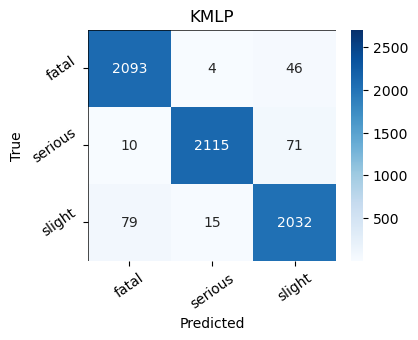

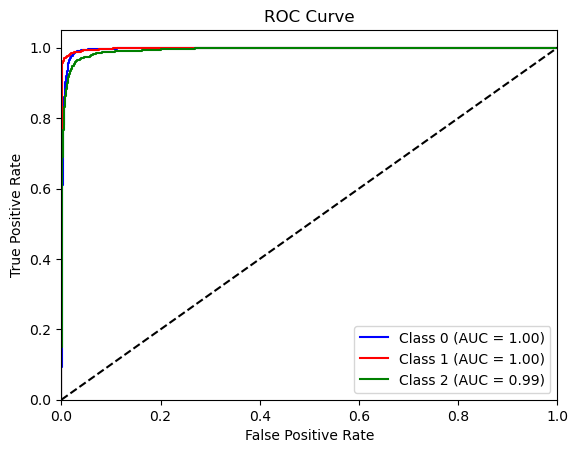


Cross-Validation Scores: [0.92513534 0.97370456 0.96813119 0.97354579 0.94337871]
Cross-Validation Accuracy: 0.9568

--- KDT ---
Accuracy: 0.9618
F1-Score: 0.9616
Precision: 0.9621
Recall: 0.9618

Confusion Matrix:
[[2091   16   36]
 [  23 2139   34]
 [ 105   33 1988]]


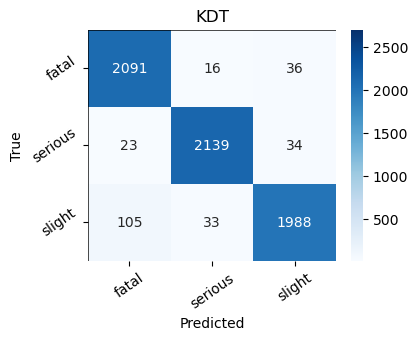

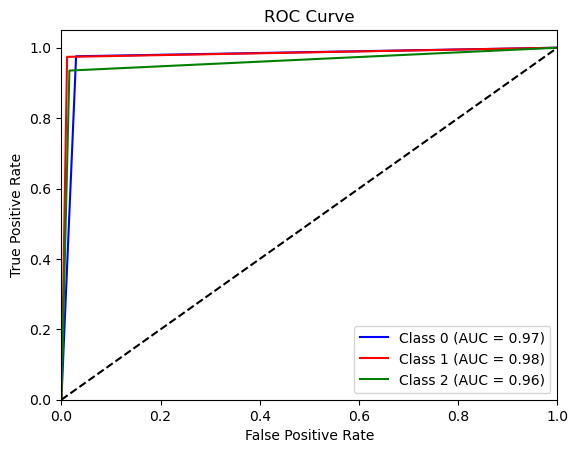


Cross-Validation Scores: [0.94044857 0.96504254 0.95962252 0.96967822 0.93579827]
Cross-Validation Accuracy: 0.9541

--- K2NN ---
Accuracy: 0.8141
F1-Score: 0.7914
Precision: 0.8493
Recall: 0.8141

Confusion Matrix:
[[2143    0    0]
 [  20 2153   23]
 [ 411  748  967]]


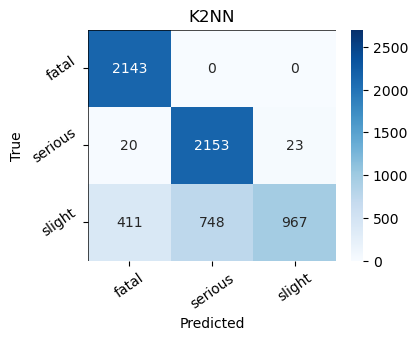

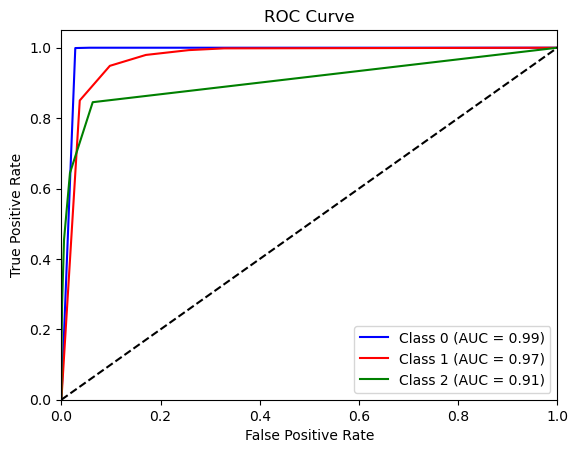


Cross-Validation Scores: [0.80464037 0.81423047 0.80894183 0.81497525 0.80368193]
Cross-Validation Accuracy: 0.8093



In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate and print performance metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print()
    
    # Class names
    class_names = ['fatal', 'serious', 'slight']
    
    # Confusion Matrix
    #custom_cmap = LinearSegmentedColormap.from_list('custom', ['#989b9e', '#36109e','#63109e'])
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    

    plt.figure(figsize=(4, 3))
    
    # Plot the outer boundary
    plt.plot([0, len(class_names)], [0, 0], color='black', linewidth=0.5)
    plt.plot([0, 0], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([len(class_names), len(class_names)], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([0, len(class_names)], [len(class_names), len(class_names)], color='black', linewidth=0.5)
    
    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',vmax=2700)
    plt.gca().set_frame_on(False)
    
    # Rotate the class names by 35 degrees
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name}')
    plt.show()

    if hasattr(model, 'predict_proba'):
        n_classes = len(np.unique(y_test))
        y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

        y_scores = model.predict_proba(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        colors = ['blue', 'red', 'green']  # Add more colors as needed for additional classes
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='black', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        print()
    else:
        print("AUC: Not available for this model.\n")

# Perform evaluation for each model
models = [KRF, KLGBM, KXGB, KMLP, KDT, K2NN]
model_names = ['KRF', 'KLGBM', 'KXGB', 'KMLP', 'KDT', 'K2NN']

for model, name in zip(models, model_names):
    print(f"--- {name} ---")
    evaluate_model(model, X_test, y_test)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring=make_scorer(accuracy_score))
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}\n")


--- KRF ---
Accuracy: 0.9796
F1-Score: 0.9796
Precision: 0.9802
Recall: 0.9796

Confusion Matrix:
[[2088   13   42]
 [   1 2132   63]
 [  12    1 2113]]


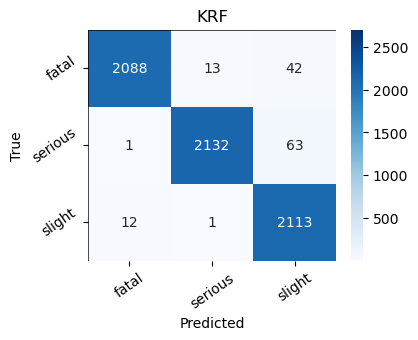

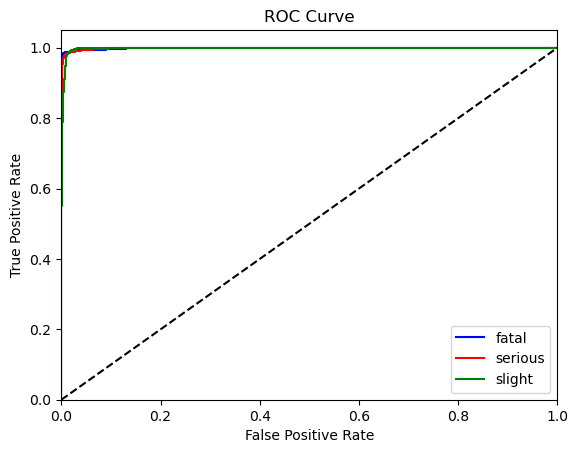


Cross-Validation Scores: [0.93611756 0.99350348 0.99319307 0.99334777 0.98143564]
Cross-Validation Accuracy: 0.9795

--- KLGBM ---
Accuracy: 0.9813
F1-Score: 0.9813
Precision: 0.9815
Recall: 0.9813

Confusion Matrix:
[[2104    9   30]
 [   5 2144   47]
 [  21    9 2096]]


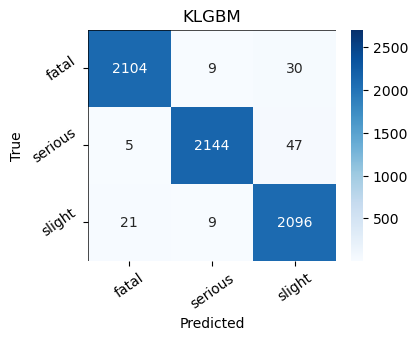

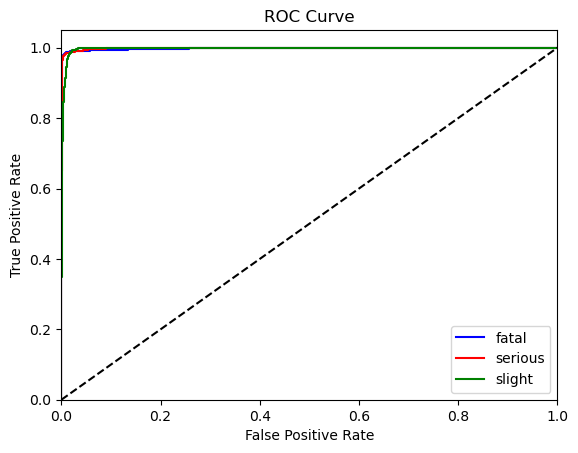


Cross-Validation Scores: [0.93395205 0.99273009 0.99288366 0.99443069 0.96642946]
Cross-Validation Accuracy: 0.9761

--- KXGB ---
Accuracy: 0.9838
F1-Score: 0.9837
Precision: 0.9839
Recall: 0.9838

Confusion Matrix:
[[2112    9   22]
 [   3 2152   41]
 [  21    9 2096]]


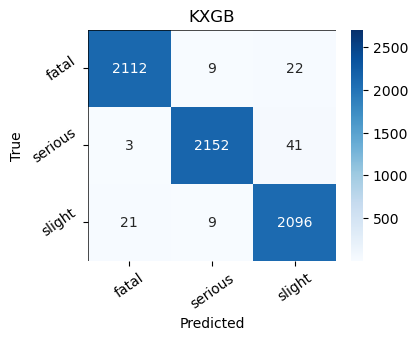

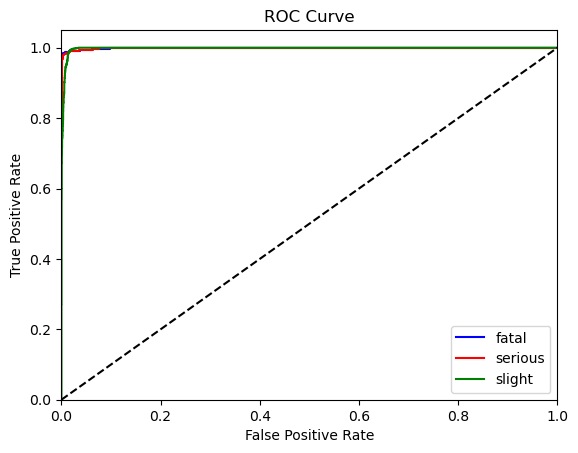


Cross-Validation Scores: [0.93642691 0.99644238 0.99412129 0.99582302 0.96828589]
Cross-Validation Accuracy: 0.9782

--- KMLP ---
Accuracy: 0.9652
F1-Score: 0.9651
Precision: 0.9656
Recall: 0.9652

Confusion Matrix:
[[2093    4   46]
 [  10 2115   71]
 [  79   15 2032]]


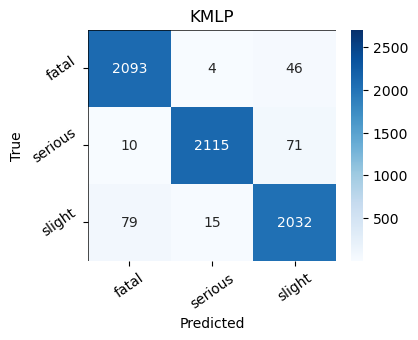

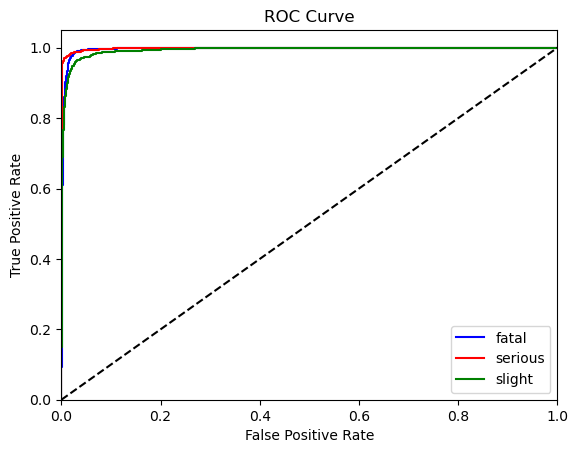


Cross-Validation Scores: [0.9328693  0.97215777 0.97957921 0.96472772 0.95869431]
Cross-Validation Accuracy: 0.9616

--- KDT ---
Accuracy: 0.9618
F1-Score: 0.9616
Precision: 0.9621
Recall: 0.9618

Confusion Matrix:
[[2091   16   36]
 [  23 2139   34]
 [ 105   33 1988]]


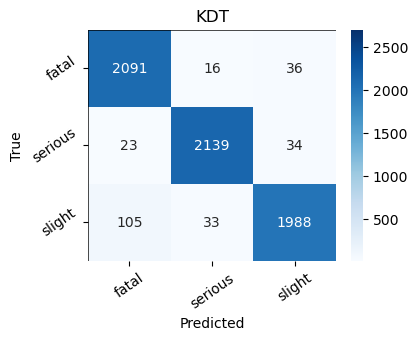

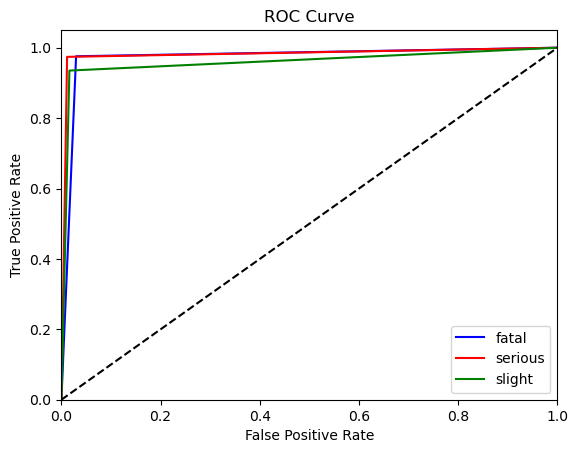


Cross-Validation Scores: [0.93998453 0.96411446 0.96024134 0.97091584 0.93502475]
Cross-Validation Accuracy: 0.9541

--- K2NN ---
Accuracy: 0.8141
F1-Score: 0.7914
Precision: 0.8493
Recall: 0.8141

Confusion Matrix:
[[2143    0    0]
 [  20 2153   23]
 [ 411  748  967]]


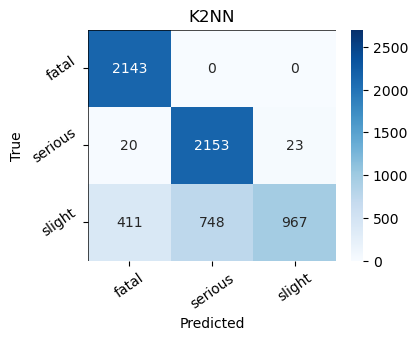

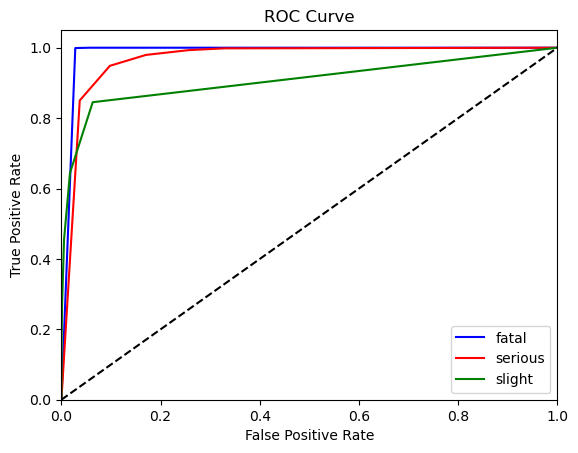


Cross-Validation Scores: [0.80464037 0.81423047 0.80894183 0.81497525 0.80368193]
Cross-Validation Accuracy: 0.8093



In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate and print performance metrics
def evaluate_model(model, X_test, y_test_resampled):
    y_pred = model.predict(X_test)
    
    # Class names
    class_names = ['Slightly_', 'Serious injured', 'Fatal injured']
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print()
    
    # Class names
    class_names = ['fatal', 'serious', 'slight']
    
    # Confusion Matrix
    #custom_cmap = LinearSegmentedColormap.from_list('custom', ['#989b9e', '#36109e','#63109e'])
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    

    plt.figure(figsize=(4, 3))
    
    # Plot the outer boundary
    plt.plot([0, len(class_names)], [0, 0], color='black', linewidth=0.5)
    plt.plot([0, 0], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([len(class_names), len(class_names)], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([0, len(class_names)], [len(class_names), len(class_names)], color='black', linewidth=0.5)
    
    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',vmax=2700)
    plt.gca().set_frame_on(False)
    
    # Rotate the class names by 35 degrees
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name}')
    plt.show()

    if hasattr(model, 'predict_proba'):
        n_classes = len(np.unique(y_test_resampled))
        y_test_bin = label_binarize(y_test_resampled, classes=np.arange(n_classes))

        y_scores = model.predict_proba(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        colors = ['blue', 'red', 'green']  # Add more colors as needed for additional classes
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='black', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.legend(labels=class_names, loc='lower right')  # Add class names to the legend
        plt.show()

        print()
    else:
        print("AUC: Not available for this model.\n")

# Perform evaluation for each model
models = [KRF, KLGBM, KXGB, KMLP, KDT, K2NN]
model_names = ['KRF', 'KLGBM', 'KXGB', 'KMLP', 'KDT', 'K2NN']

for model, name in zip(models, model_names):
    print(f"--- {name} ---")
    evaluate_model(model, X_test, y_test)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring=make_scorer(accuracy_score))
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}\n")


--- KRF ---
Accuracy: 0.9796
F1-Score: 0.9796
Precision: 0.9802
Recall: 0.9796

Confusion Matrix:
[[2088   13   42]
 [   1 2132   63]
 [  12    1 2113]]


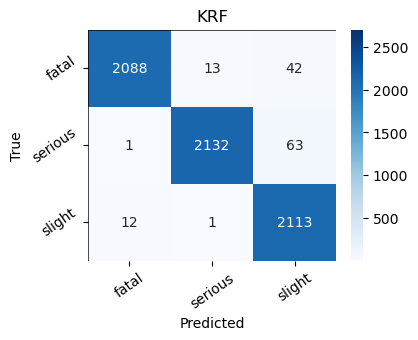

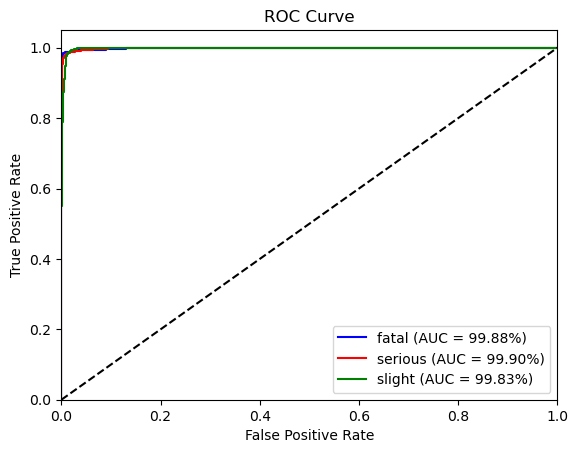


Cross-Validation Scores: [0.93611756 0.99350348 0.99319307 0.99334777 0.98143564]
Cross-Validation Accuracy: 0.9795

--- KLGBM ---
Accuracy: 0.9813
F1-Score: 0.9813
Precision: 0.9815
Recall: 0.9813

Confusion Matrix:
[[2104    9   30]
 [   5 2144   47]
 [  21    9 2096]]


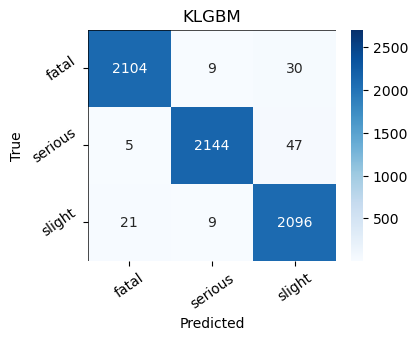

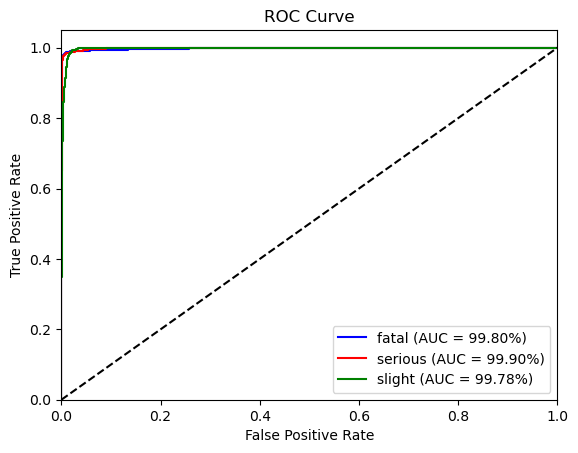


Cross-Validation Scores: [0.93395205 0.99273009 0.99288366 0.99443069 0.96642946]
Cross-Validation Accuracy: 0.9761

--- KXGB ---
Accuracy: 0.9838
F1-Score: 0.9837
Precision: 0.9839
Recall: 0.9838

Confusion Matrix:
[[2112    9   22]
 [   3 2152   41]
 [  21    9 2096]]


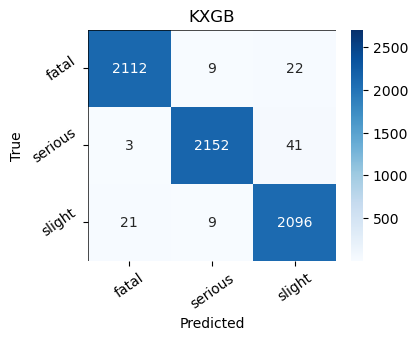

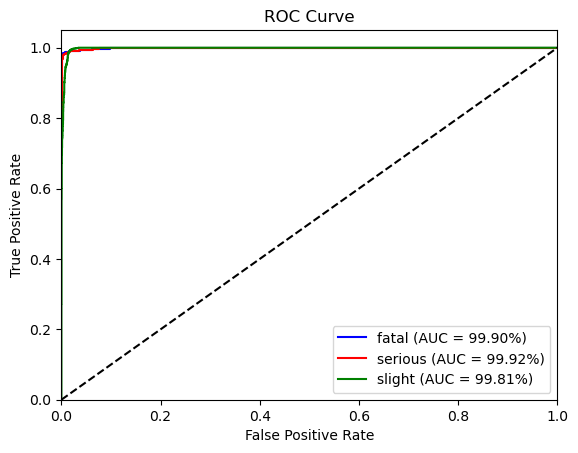


Cross-Validation Scores: [0.93642691 0.99644238 0.99412129 0.99582302 0.96828589]
Cross-Validation Accuracy: 0.9782

--- KMLP ---
Accuracy: 0.9652
F1-Score: 0.9651
Precision: 0.9656
Recall: 0.9652

Confusion Matrix:
[[2093    4   46]
 [  10 2115   71]
 [  79   15 2032]]


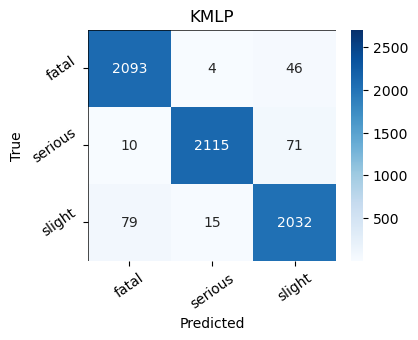

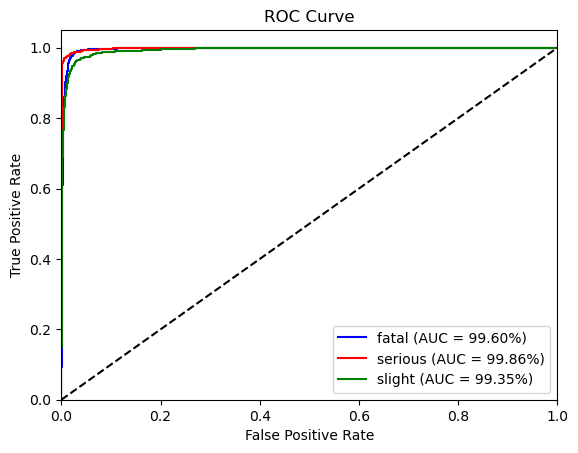


Cross-Validation Scores: [0.93611756 0.97030162 0.97602104 0.97199876 0.96163366]
Cross-Validation Accuracy: 0.9632

--- KDT ---
Accuracy: 0.9618
F1-Score: 0.9616
Precision: 0.9621
Recall: 0.9618

Confusion Matrix:
[[2091   16   36]
 [  23 2139   34]
 [ 105   33 1988]]


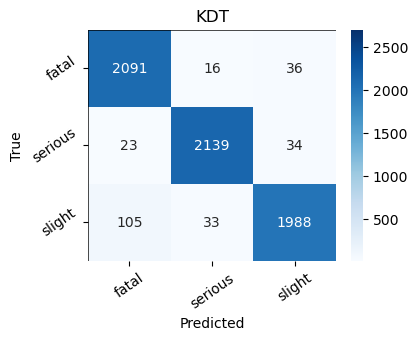

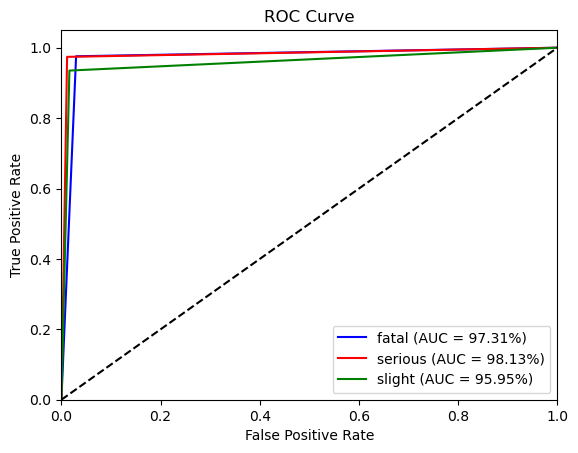


Cross-Validation Scores: [0.94013921 0.96473318 0.96194307 0.97184406 0.93703589]
Cross-Validation Accuracy: 0.9551

--- K2NN ---
Accuracy: 0.8141
F1-Score: 0.7914
Precision: 0.8493
Recall: 0.8141

Confusion Matrix:
[[2143    0    0]
 [  20 2153   23]
 [ 411  748  967]]


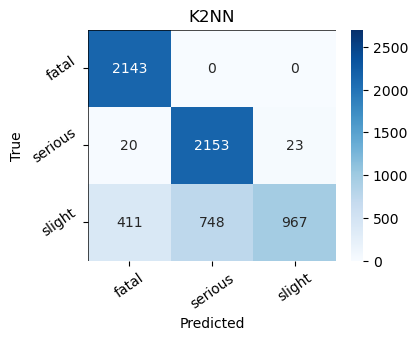

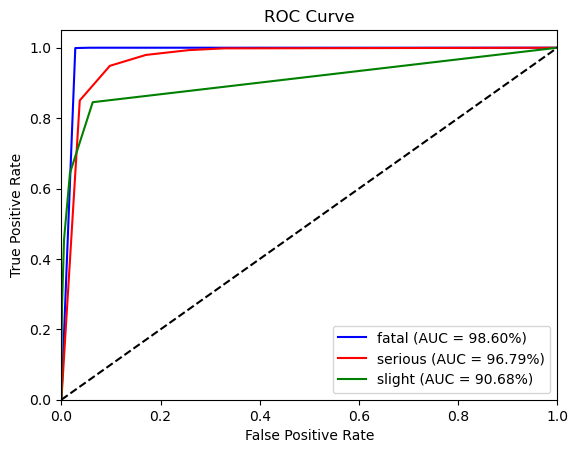


Cross-Validation Scores: [0.80464037 0.81423047 0.80894183 0.81497525 0.80368193]
Cross-Validation Accuracy: 0.8093



In [53]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate and print performance metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Class names
    class_names = ['Slightly injured', 'Serious injured', 'Fatal injured']
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print()
    
    # Class names
    class_names = ['fatal', 'serious', 'slight']
    
    # Confusion Matrix
    #custom_cmap = LinearSegmentedColormap.from_list('custom', ['#989b9e', '#36109e','#63109e'])
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    

    plt.figure(figsize=(4, 3))
    
    # Plot the outer boundary
    plt.plot([0, len(class_names)], [0, 0], color='black', linewidth=0.5)
    plt.plot([0, 0], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([len(class_names), len(class_names)], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([0, len(class_names)], [len(class_names), len(class_names)], color='black', linewidth=0.5)
    
    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',vmax=2700)
    plt.gca().set_frame_on(False)
    
    # Rotate the class names by 35 degrees
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name}')
    plt.show()

    if hasattr(model, 'predict_proba'):
        n_classes = len(np.unique(y_test))
        y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

        y_scores = model.predict_proba(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # Create a single plot for all classes
        plt.figure()
        colors = ['blue', 'red', 'green']
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
            # Plot ROC curve for each class
            plt.plot(fpr[i], tpr[i], color=colors[i], label=f'{class_names[i]} (AUC = {roc_auc[i]*100:.2f}%)')

        plt.plot([0, 1], [0, 1], color='black', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        print()
    else:
        print("AUC: Not available for this model.\n")

# Perform evaluation for each model
models = [KRF, KLGBM, KXGB, KMLP, KDT, K2NN]
model_names = ['KRF', 'KLGBM', 'KXGB', 'KMLP', 'KDT', 'K2NN']

for model, name in zip(models, model_names):
    print(f"--- {name} ---")
    evaluate_model(model, X_test, y_test)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring=make_scorer(accuracy_score))
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}\n")
